## Using David Hogg's Cross-validation approach

In [ ]:
from Chempy.score_function import Hogg_scoring
from Chempy.cem_function import posterior_function_mcmc_quick

%timeit -r 1 -n 1 Hogg_scoring()

In [ ]:
## Code to rewrite parameter file for each element in turn, so as to run MCMC for 21/22 elements only
## MUST ADD THIS INTO HOGG_SCORING in SCORE_FUNCTION.PY


## CHECK THIS RUNS 28 TIMES
    from Chempy.wrapper import single_star_optimization

	# Starting elements (copied from original parameter file)
	elements_to_trace = ['Al', 'Ar', 'B', 'Be', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga', 'Ge', 'H', 'He', 'K', 'Li', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S', 'Sc', 'Si', 'Ti', 'V', 'Zn']
	orig = "\telements_to_trace = "+str(elements_to_trace) # Original element string

	# Calculate required Chempy elements
	sol_dat = np.load("Chempy/input/stars/Proto-sun.npy")
	el_names = []
	for el in elements_to_trace:
		if el in sol_dat.dtype.names:
			el_names.append(el)
	np.save(directory+"elements.npy",np.array(el_names))
     
	# Create new parameter names
	newstr = []
	for i,el in enumerate(el_names):
		if el !='Zn':
			newstr.append(orig.replace("'"+str(el)+"', ",""))
		else:
			newstr.append(orig.replace("'"+str(el)+"', ",""))

	for i in range(len(el_names)): # Iterate over removed element
		for line in fileinput.input("Chempy/parameter.py", inplace=True):
			if "\telements_to_trace" in line:
				print(newstr[i])
			else:
				print(line,end='')
		del sys.modules['Chempy.parameter']
		from Chempy.parameter import ModelParameters
		a = ModelParameters()
		##############
		# MCMC using 21 elements only goes here
		print('Running MCMC iteration %d of %d' %(i+1,len(el_names)))
		single_star_optimization()
		restructure_chain('mcmc/')
		positions = np.load('mcmc/posteriorPDF.npy')
		median = []
		up = []
		low = []
		for j in range(len(a.p0)):
			median.append(np.percentile(positions[:,j],50))
			low.append(np.percentile(positions[:,j],15.865))
			up.append(np.percentile(positions[:,j],100-15.865))
		np.save(directory+'median%d.npy' %(i),np.array(median))
		np.save(directory+'low%d.npy' %(i),np.array(low))
		np.save(directory+'up%d.npy' %(i),np.array(up))
		##############
		for line in fileinput.input("Chempy/parameter.py", inplace=True):
			if "\telements_to_trace" in line:
				print(orig)
			else:
				print(line,end='')
		del sys.modules['Chempy.parameter']
		from Chempy.parameter import ModelParameters
		a = ModelParameters()
		##############
		# Code needing all 22 elements goes here
		param = median
		abundances,names = posterior_function_returning_predictions((param,a))
		for n,name in enumerate(names):
			if name == el_names[i]:
				required_abundance = abundances[n]
		np.save(directory+'abundance%d.npy' %(i),required_abundance)
	return None

## Test all values in posterior distribution to create distribution for element

In [4]:
def element_predictor(params):
    _,all_abun = posterior_function_mcmc_quick(params,elements,preload)
    return all_abun[i]

In [ ]:
%pylab inline
import multiprocessing as mp
import tqdm
i = 0 # Element index - CHANGE
element_mean = [] # Insert early in code if want to save this
element_sigma = []


from Chempy.cem_function import posterior_function_mcmc_quick
from Chempy.score_function import preload_params_mcmc
preload = preload_params_mcmc()
from Chempy.parameter import ModelParameters
a = ModelParameters()
elements = []
for item in a.elements_to_trace:
    if item in preload.wildcard.dtype.names:
        elements.append(item)
plot_hist = True # Controls whether to plot histogram of chain at each point

## AFTER RESTRUCTURING CHAIN
abundance = []
positions = np.load('mcmc/posteriorPDF.npy')

# Start multiprocessing
p = mp.Pool()
abundance = list(tqdm.tqdm(p.imap_unordered(element_predictor, positions), total=len(positions)))
#params = []
#norm_params = []
#abun = []
#p.join()
#p.close()
#result = np.vstack(t)

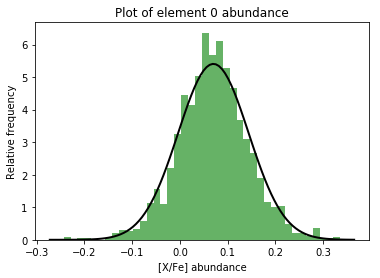

In [18]:
#for j,param in enumerate(positions):
#    _,all_abun = posterior_function_mcmc_quick(param,elements,preload)
#    abundance.append(all_abun[i]) # Take correct abundance only
#    if j%500==0:
#        print('Using parameter %d of ~5000' %(j))
# This produces the PDF of the abundances
# Fit a gaussian to this PDF
from scipy.stats import norm
plot_hist = True
abundance = np.array(abundance)
mean,sigma=norm.fit(abundance)

element_mean.append(mean) # This gives Gaussian predictions and widths for element
element_sigma.append(sigma)

if plot_hist == True:
    plt.clf()
    plt.hist(abundance, bins=40, normed=True, alpha=0.6, color='g')
    #abundance = np.array(abundance) # Unmask array
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, sigma)
    plt.plot(x, p, c='k', linewidth=2)
    title = 'Plot of element %d abundance' %(i)
    plt.title(title)
    plt.xlabel('[X/Fe] abundance')
    plt.ylabel('Relative frequency')
    
#likelihood_temp = norm.pdf(mean,loc= # IMPORT SOLAR DATA HERE + USE FOR LIKELIHOOD - ERR is in quadrature with std

In [13]:
abundance

[masked_array(data = [0.10189958761668433],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.029475971009554625],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.0865928182012109],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.08874163412270014],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.09259633281702695],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.1747256068712284],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.16011085898318295],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.2679007257067898],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.18115961502334244],
              mask = [False],
        fill_value = 1e+20), masked_array(data = [0.16738626676183815],
              mask = [False],
        fi

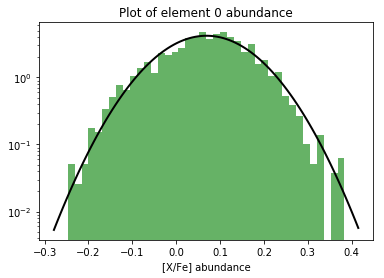

In [39]:
plt.clf()
plt.hist(abundance, bins=40, normed=True, alpha=0.6, color='g')
abundance = np.array(abundance) # Unmask array
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, sigma)
plt.plot(x, p, c='k', linewidth=2)
title = 'Plot of element %d abundance' %(i)
plt.title(title)
plt.xlabel('[X/Fe] abundance')
plt.yscale('log')

In [20]:
sigma

0.073804194444048912

In [4]:
## THIS CODE WILL CALL THE HOGG FUNCTION ONCE IMPLEMENTED PROPERLY
import fileinput
import sys
from Chempy.parameter import ModelParameters
from Chempy.score_function import Hogg_scoring
for index in [1., 1.2, 1.4, 1.7, 2., 2.5, 3., 4., 5., 6., 8., 10., 12., 15., 18., 22., 26., 30., 40., 50.]:
    for line in fileinput.input("Chempy/parameter.py", inplace=True):
        if "\tbeta_param =" in line:
            print("\tbeta_param = %.2f" %(index))
        else:
            print(line,end='')
    del sys.modules['Chempy.parameter']
    Hogg_scoring(index)

Running MCMC iteration 1 of 22
['Proto-sun']
first minimization for each star separately took:  1 seconds


KeyboardInterrupt: 